# Lomas: Client demo

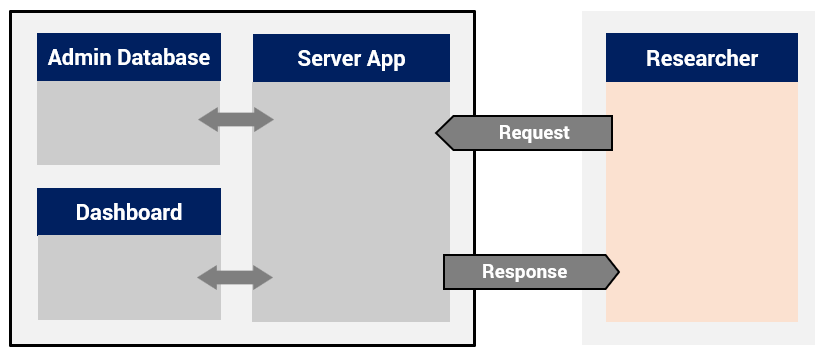

In [1]:
from IPython.display import Image
Image(filename="images/image_mini_demo_client.png", width=800)

## Step 1: Install the library
Install the library `lomas-client` via the pip command:

In [31]:
!pip install lomas-client

In [3]:
from lomas_client import Client
import numpy as np

## Step 2: Initialise the client

Once the library is installed, a Client object must be created. It is responsible for sending requests to the server and processing responses in the local environment. It enables a seamless interaction with the server. 

To create the client, give it a few parameters:
- a url: the root application endpoint to the remote secure server.
- user_name: her name as registered in the database
- dataset_name: the name of the dataset that she wants to query

In [ ]:
DATASET_NAME = "PENGUIN"

In [ ]:
# The following would usually be set in the environment by a system administrator
# and be tranparent to lomas users.
APP_URL = "http://lomas_server"
USER_NAME = "Dr.Antartica"
import os
os.environ["LOMAS_CLIENT_ID"] = USER_NAME
os.environ["LOMAS_CLIENT_SECRET"] = USER_NAME.lower()
os.environ["LOMAS_KEYCLOAK_ADDRESS"] = "keycloak"
os.environ["LOMAS_KEYCLOAK_PORT"] = "8080"
os.environ["LOMAS_KEYCLOAL_USE_TLS"] = "0"
os.environ["LOMAS_REALM"] = "lomas"

In [ ]:
client = Client(url=APP_URL, dataset_name=DATASET_NAME)

## Step 3: Use the library

### a. Get metadata

In [5]:
penguin_metadata = client.get_dataset_metadata()
penguin_metadata

{'max_ids': 1,
 'rows': 344,
 'row_privacy': True,
 'censor_dims': False,
 'columns': {'species': {'private_id': False,
   'nullable': False,
   'max_partition_length': None,
   'max_influenced_partitions': None,
   'max_partition_contributions': None,
   'type': 'string',
   'cardinality': 3,
   'categories': ['Adelie', 'Chinstrap', 'Gentoo']},
  'island': {'private_id': False,
   'nullable': False,
   'max_partition_length': None,
   'max_influenced_partitions': None,
   'max_partition_contributions': None,
   'type': 'string',
   'cardinality': 3,
   'categories': ['Torgersen', 'Biscoe', 'Dream']},
  'bill_length_mm': {'private_id': False,
   'nullable': False,
   'max_partition_length': None,
   'max_influenced_partitions': None,
   'max_partition_contributions': None,
   'type': 'float',
   'precision': 64,
   'lower': 30.0,
   'upper': 65.0},
  'bill_depth_mm': {'private_id': False,
   'nullable': False,
   'max_partition_length': None,
   'max_influenced_partitions': None,
   'm

### b. Get a dummy dataset

In [6]:
NB_ROWS = 100
SEED = 0

In [7]:
df_dummy = client.get_dummy_dataset(
    nb_rows = NB_ROWS, 
    seed = SEED
)

print(df_dummy.shape)
df_dummy.head()

(100, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,46.799577,16.196816,239.680123,3010.840470,FEMALE
1,Chinstrap,Dream,38.133052,14.875077,208.332005,6689.525543,MALE
2,Chinstrap,Torgersen,58.065820,19.725266,154.021822,2473.883392,MALE
3,Adelie,Torgersen,62.323556,14.951074,221.148682,2024.497075,FEMALE
4,Adelie,Dream,39.314560,18.776879,206.902585,3614.604018,MALE


### c. Compute average bill length with Smartnoise-SQL

In [8]:
response = client.smartnoise_sql.query(
    query = "SELECT AVG(bill_length_mm) AS avg_bill_length_mm FROM df",  
    epsilon = 0.5, 
    delta = 1e-4,
    dummy = True
)

In [9]:
avg_bill_length = np.round(response.result.df['avg_bill_length_mm'].iloc[0], 2)
print(f"Average bill length of penguins in real data: {avg_bill_length}mm.")

Average bill length of penguins in real data: 45.51mm.
